# REGRESIÓN LOGISTICA PARA TELCO CUSTOMER CHURN
## FUENTE : [KAGGLE](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [ ]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
path = kagglehub.dataset_download("blastchar/telco-customer-churn")
file = '/WA_Fn-UseC_-Telco-Customer-Churn.csv'

path_file = path + file

print("Path to dataset files:", path_file)


df_data = pd.read_csv(path_file)
df_data.head(5)

Path to dataset files: /root/.cache/kagglehub/datasets/blastchar/telco-customer-churn/versions/1/WA_Fn-UseC_-Telco-Customer-Churn.csv


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
import re

# Función para convertir nombres de columnas a snake_case
def to_snake_case(name):
    name = re.sub(r'([A-Z]+)([A-Z][a-z])', r'\1_\2', name)  # Separar mayúsculas juntas
    name = re.sub(r'([a-z\d])([A-Z])', r'\1_\2', name)  # Separar camelCase
    name = name.replace(" ", "_")  # Reemplazar espacios por guiones bajos
    return name.lower()

df_data.columns = [to_snake_case(col) for col in df_data]
df_data

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# EDA

In [10]:
df_data.dtypes.value_counts()

,count
object,18
int64,2
float64,1


In [11]:
df_data.isna().sum().sum()

0

In [12]:
df_data.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges', 'churn'],
      dtype='object')

In [13]:
df_data.drop('customer_id',axis=1,inplace=True)
df_data.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [14]:
df_data['churn'] = df_data['churn'].map({'Yes': 1, 'No': 0})
df_data.head(2)

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0


In [15]:
df_data.dtypes

,0
gender,object
senior_citizen,int64
partner,object
dependents,object
tenure,int64
phone_service,object
multiple_lines,object
internet_service,object
online_security,object
online_backup,object


In [16]:
df_data['total_charges'] = pd.to_numeric(df_data['total_charges'],errors='coerce')
df_data.dtypes

,0
gender,object
senior_citizen,int64
partner,object
dependents,object
tenure,int64
phone_service,object
multiple_lines,object
internet_service,object
online_security,object
online_backup,object


# CODIFICACIÓN DE VARIABLES CATEGORICAS

In [17]:
df = df_data.copy()

In [18]:
categorical_columns = df.select_dtypes(object).columns
categorical_columns

Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method'],
      dtype='object')

In [19]:
df['partner'] = df['partner'].map({'Yes': 1, 'No': 0})
df['dependents'] = df['dependents'].map({'Yes': 1, 'No': 0})
df['phone_service'] = df['phone_service'].map({'Yes': 1, 'No': 0})
df['paperless_billing'] = df['paperless_billing'].map({'Yes': 1, 'No': 0})


In [20]:
df.dtypes

,0
gender,object
senior_citizen,int64
partner,int64
dependents,int64
tenure,int64
phone_service,int64
multiple_lines,object
internet_service,object
online_security,object
online_backup,object


In [21]:
for cc in categorical_columns:
  print("*"*50)
  print(df[cc].value_counts())

**************************************************
gender
Male      3555
Female    3488
Name: count, dtype: int64
**************************************************
partner
0    3641
1    3402
Name: count, dtype: int64
**************************************************
dependents
0    4933
1    2110
Name: count, dtype: int64
**************************************************
phone_service
1    6361
0     682
Name: count, dtype: int64
**************************************************
multiple_lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
**************************************************
internet_service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
**************************************************
online_security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
**************************************************
online_backup

In [22]:
import sklearn.compose
import sklearn.preprocessing
transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OneHotEncoder(),categorical_columns),
    remainder='passthrough'
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 Index(['gender', 'partner', 'dependents', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method'],
      dtype='object'))])

In [23]:
data_transformed_df = (
    pd.DataFrame(
        transformer.fit_transform(df),
        columns = transformer.get_feature_names_out(),
        index=df.index
    )
)

data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("ordinalencoder__", "").replace("onehotencoder__", "").replace("remainder__", "")
)
data_transformed_df.columns = [to_snake_case(col) for col in data_transformed_df]
data_transformed_df
data_transformed_df

,gender_female,gender_male,partner_0,partner_1,dependents_0,dependents_1,phone_service_0,phone_service_1,multiple_lines_no,multiple_lines_no_phone_service,...,paperless_billing_1,payment_method_bank_transfer_(automatic),payment_method_credit_card_(automatic),payment_method_electronic_check,payment_method_mailed_check,senior_citizen,tenure,monthly_charges,total_charges,churn
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,29.85,29.85,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,34.0,56.95,1889.50,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,2.0,53.85,108.15,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,45.0,42.30,1840.75,0.0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,24.0,84.80,1990.50,0.0
7039,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,72.0,103.20,7362.90,0.0
7040,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,11.0,29.60,346.45,0.0
7041,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,4.0,74.40,306.60,1.0


In [24]:
corr_matrix = data_transformed_df.corr()
corr_churn = corr_matrix['churn']
corr_churn.sort_values(ascending=False)

,churn
churn,1.000000
contract_month-to-month,0.405103
online_security_no,0.342637
tech_support_no,0.337281
internet_service_fiber_optic,0.308020
payment_method_electronic_check,0.301919
online_backup_no,0.268005
device_protection_no,0.252481
monthly_charges,0.193356
paperless_billing_1,0.191825


<Axes: >

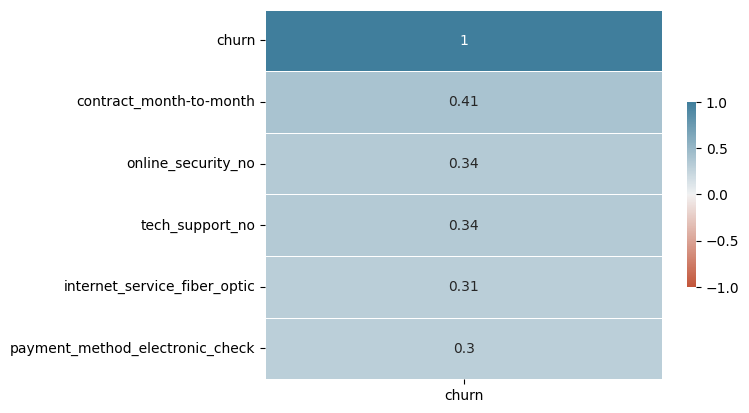

In [35]:
sns.heatmap(
    data=corr_churn[corr_churn > 0.3].sort_values(ascending=False).to_frame(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

In [26]:
corr_filtered = corr_churn[corr_churn > 0.3]
cols = corr_filtered.index.tolist()
cols

['internet_service_fiber_optic',
 'online_security_no',
 'tech_support_no',
 'contract_month-to-month',
 'payment_method_electronic_check',
 'churn']

# ENTRENANDO MODELO DE REGRESIÓN LOGISTICA

In [28]:
df_data_processing = data_transformed_df[cols].copy()
df_data_processing.head(5)

,internet_service_fiber_optic,online_security_no,tech_support_no,contract_month-to-month,payment_method_electronic_check,churn
0,0.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0


## ESCALABILIDAD DE DATOS

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_data_preprocessing_scaled = scaler.fit_transform(df_data_processing)
df_data_preprocessing_scaled = pd.DataFrame(df_data_preprocessing_scaled)
df_data_preprocessing_scaled.columns = df_data_processing.columns
df_data_preprocessing_scaled

,internet_service_fiber_optic,online_security_no,tech_support_no,contract_month-to-month,payment_method_electronic_check,churn
0,0.0,1.0,1.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
7038,0.0,0.0,0.0,0.0,0.0,0.0
7039,1.0,1.0,1.0,0.0,0.0,0.0
7040,0.0,0.0,1.0,1.0,1.0,0.0
7041,1.0,1.0,1.0,1.0,0.0,1.0


In [30]:
X = df_data_preprocessing_scaled.drop('churn',axis=1)
y = df_data_preprocessing_scaled['churn'].values

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train,y_train)

In [33]:
from sklearn import metrics
y_pred = model.predict(X_test)
print(f'accuracy : {metrics.accuracy_score(y_test,y_pred)}')

accuracy : 0.7841930903928065


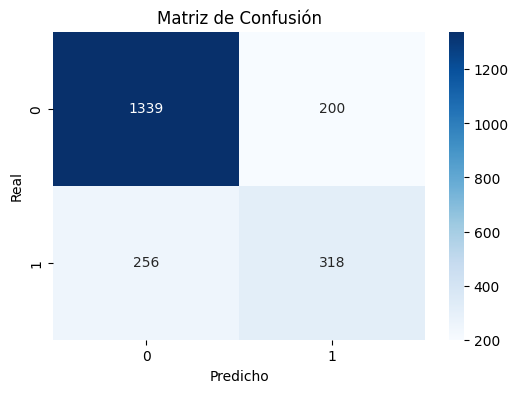

In [34]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()